Importing Packages & Cleaning:
=============================

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import sklearn as skl

In [42]:
df= pd.read_csv('Titanic-Dataset.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
df.shape

(712, 11)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [44]:
df = df.drop("Cabin", axis = 1)

In [45]:
df = df.dropna()
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
gender_df = pd.get_dummies(df['Sex'])
gender_df

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [48]:
X= gender_df.iloc[:,:]
Y= df.iloc[:,1]

Predictive model(w.r.t Gender):
===============================

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features= SelectKBest(score_func=chi2, k=2)
fit= best_features.fit(X,Y)

In [50]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [51]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Gender', 'Score']
features_scores.sort_values(by = 'Score')

,Gender,Score
1,male,74.621277
0,female,130.515207


In [54]:
X= gender_df
Y= df[['Survived']]
Y = np.ravel(Y)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

In [56]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [57]:
Y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (Y_pred) #predicted values

     female   male
720    True  False
879    True  False
360   False   True
192    True  False
770   False   True
..      ...    ...
287   False   True
693   False   True
751   False   True
404    True  False
841   False   True

[285 rows x 2 columns]
[1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0
 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0]


Precision & ROC Curve:
=====================

In [58]:
from sklearn import metrics
from sklearn.metrics import classification_report

print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))
print("Recall: ",metrics.recall_score(Y_test, Y_pred, zero_division=1))
print("Precision:",metrics.precision_score(Y_test, Y_pred, zero_division=1))
print("CL Report:",metrics.classification_report(Y_test, Y_pred, zero_division=1))

Accuracy:  0.7964912280701755
Recall:  0.6974789915966386
Precision: 0.7904761904761904
CL Report:               precision    recall  f1-score   support

           0       0.80      0.87      0.83       166
           1       0.79      0.70      0.74       119

    accuracy                           0.80       285
   macro avg       0.80      0.78      0.79       285
weighted avg       0.80      0.80      0.79       285



In [59]:
y_pred_proba= logreg.predict_proba(X_test) [::,1]

In [60]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(Y_test, y_pred_proba)

In [61]:
auc= metrics.roc_auc_score(Y_test, y_pred_proba)

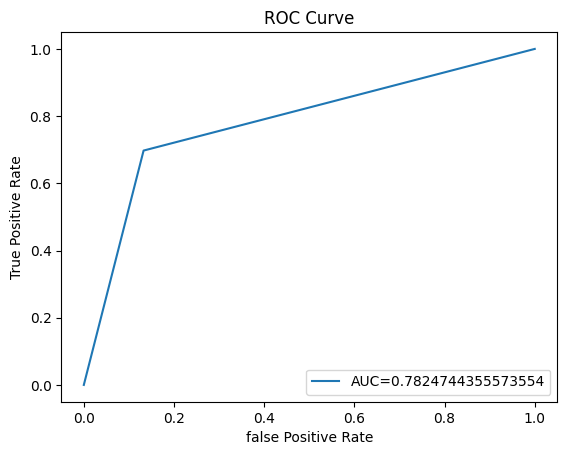

In [62]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)